In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

import csv

warnings.filterwarnings("ignore")

data = pd.read_csv(r'C:\Users\m_cor\Downloads\marketing_campaign.csv')
                   

In [3]:

# rename the columns in the data to sound more sensical
data.rename(columns = {'Year_Birth': 'YearBirth',
                       'Marital_Status': 'MaritalStatus', 
                       'Dt_Customer': 'DtCustomer', 
                       'Z_CostContact': 'ZCostContact',
                       'Z_Revenue': 'ZRevenue', 
                       'Kidhome': 'KidHome',
                       'Teenhome': 'TeenHome'}, inplace = True)
data.head()


,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Education average.
unique_Education = pd.unique(data.Education)

# find Income averages in Education specific
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # create Education filter
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in Income column fill with 52720.37 when Education:Graduation
Missing Value in Income column fill with 56145.31 when Education:PhD
Missing Value in Income column fill with 52917.53 when Education:Master
Missing Value in Income column fill with 20306.26 when Education:Basic
Missing Value in Income column fill with 47633.19 when Education:2n Cycle


In [30]:
data.duplicated().sum()

0

In [8]:

#create Age column 
age = []
for i in data["YearBirth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
data["Age"] = age

data.head()


,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,Elderly
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,Elderly
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,MiddleAge
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,Young
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,Young


In [10]:
# statistical information about numerical data
data.drop(["AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "AcceptedCmp1",
           "AcceptedCmp2", "Complain", "Response"], axis=1).describe()

,ID,YearBirth,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52253.592339,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25039.085599,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


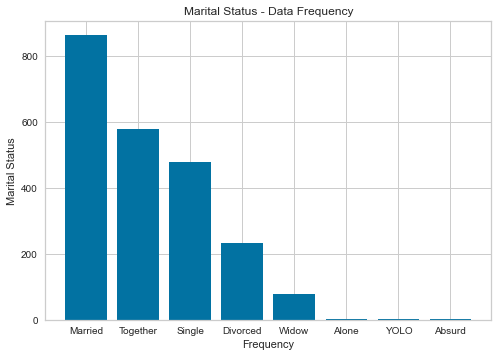

Number of Samples According to Marital Status 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: MaritalStatus, dtype: int64


In [14]:
# Number of sample according to MaritalStatus
plt.figure()
plt.bar(data["MaritalStatus"].value_counts().index, data["MaritalStatus"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Marital Status")
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of Samples According to Marital Status \n{data['MaritalStatus'].value_counts()}")

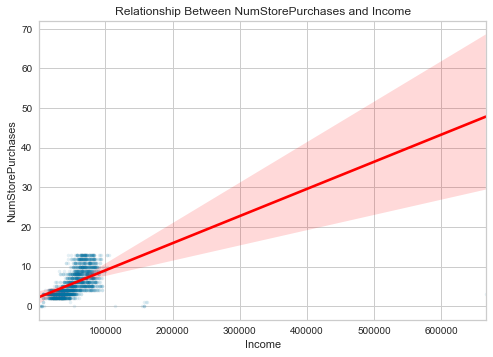

In [15]:
sns.regplot(x='Income', y='NumStorePurchases', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.title('Relationship Between NumStorePurchases and Income')
plt.show()

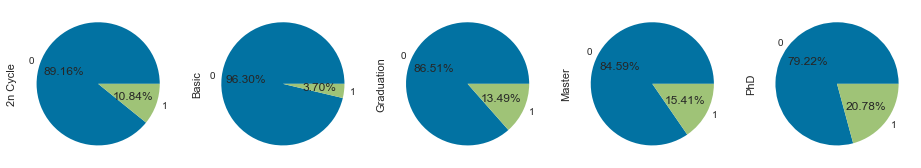

In [16]:
# see the response rate according to education
pd.crosstab(index=data['Response'], columns=data['Education']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

In [39]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace(["2n Cycle"], ["Master"], inplace = True)
                          
                          # Hint: Use the replace() method and inplace=True

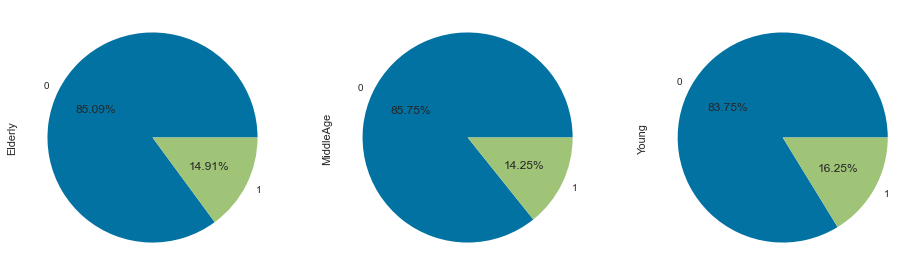

In [23]:
# see the response rate according to education
pd.crosstab(index=data['Response'], columns=data['Age']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

In [41]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["MaritalStatus"].replace(["Absurd","Alone","YOLO"] ,["Single","Single","Single"],inplace = True)
                               
                               # Hint: Use the replace() method and inplace=True

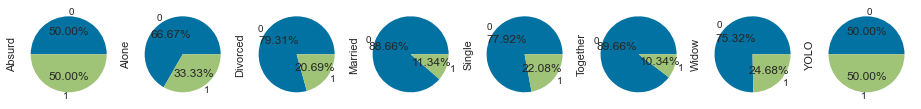

In [18]:
# see the response rate according to marriage status
pd.crosstab(index=data['Response'], columns=data['MaritalStatus']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

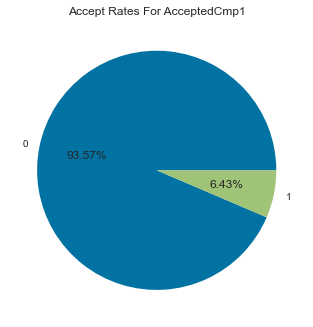

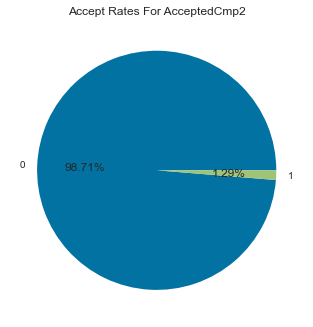

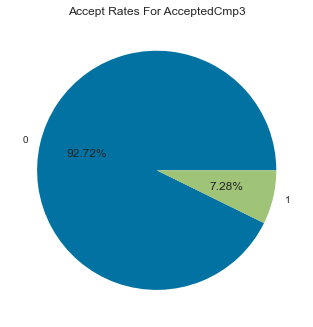

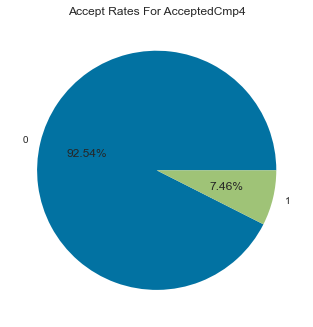

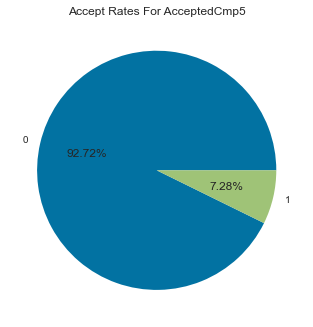

In [19]:
# looking at campaign acceptance rate to anaylze marketing efforts
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",]
for i in campaigns:
    accept_rate = (data.groupby(i).size() / data[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=data[i].unique(), autopct='%1.2f%%')
    plt.show() 

In [ ]:
# The second campaign is the most accepted

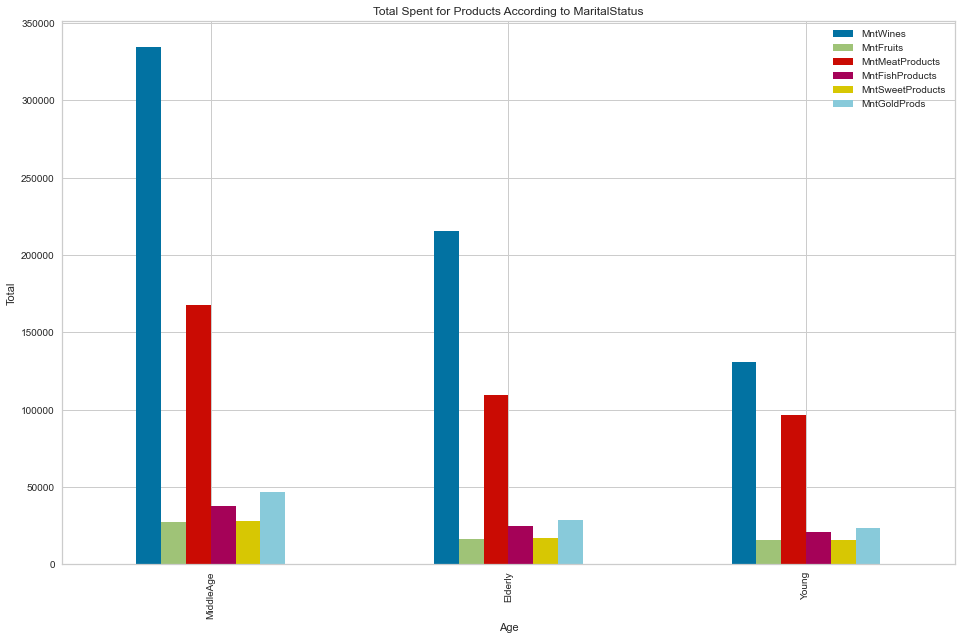

In [22]:
# total spent by product type by marital status
df = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Age']].groupby(["Age"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
df.plot(x="Age", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to MaritalStatus")
plt.show()

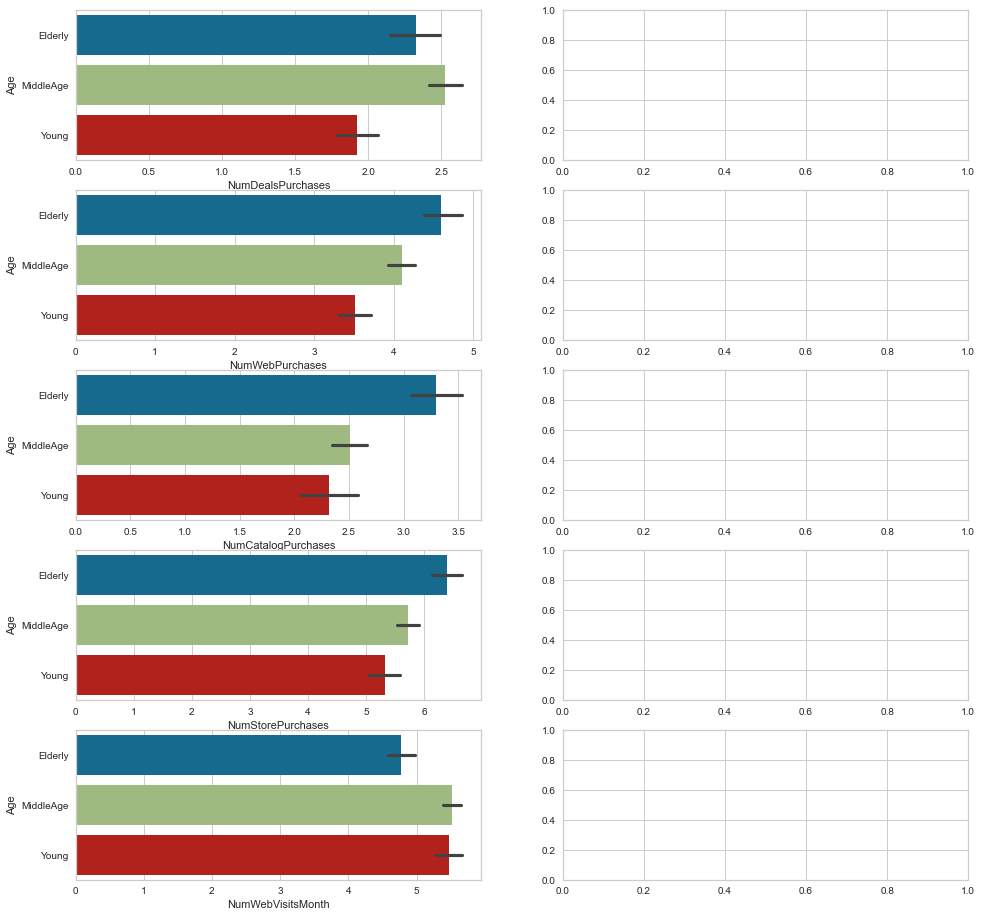

In [67]:
fig,ax = plt.subplots(5,2,figsize=(16,16))
sns.barplot(x='NumDealsPurchases',y='Age',data=data,ax=ax[0,0])

sns.barplot(x='NumWebPurchases',y='Age',data=data,ax=ax[1,0])

sns.barplot(x='NumCatalogPurchases',y='Age',data=data,ax=ax[2,0])

sns.barplot(x='NumStorePurchases',y='Age',data=data,ax=ax[3,0])

sns.barplot(x='NumWebVisitsMonth',y='Age',data=data,ax=ax[4,0])

plt.show()

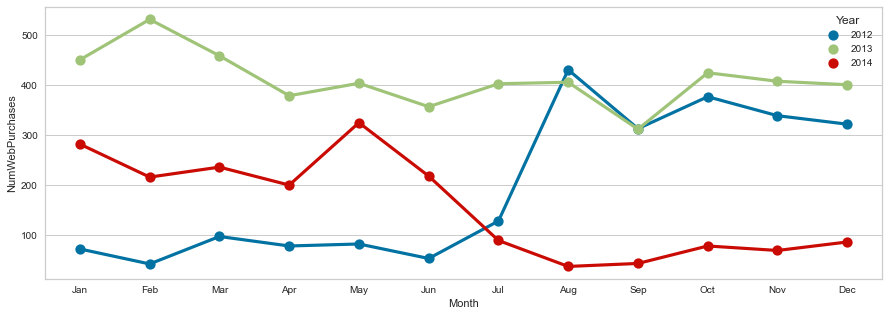

In [71]:
# Web purchases by month
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['Month', 'Year', "NumWebPurchases"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'NumWebPurchases'], ascending=False)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="NumWebPurchases", data=df, hue="Year")
plt.show()

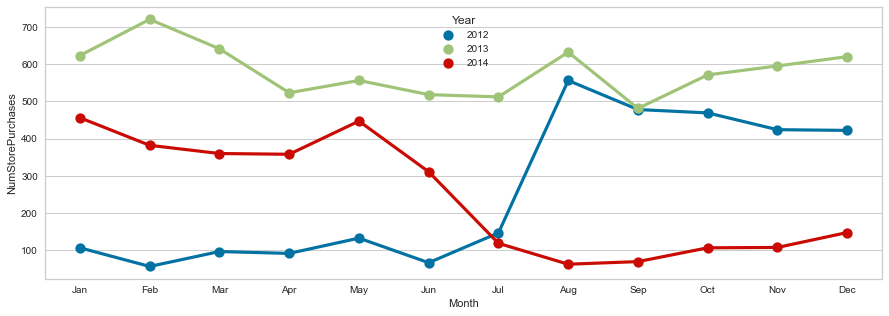

In [73]:
# number of purchases made online
#creating date col
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
#creating a copy of the data to replace 
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['Month', 'Year', "NumStorePurchases"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'NumStorePurchases'], ascending=False)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="NumStorePurchases", data=df, hue="Year")
plt.show()

In [ ]:
# There is little correlation or determined seasonality of purchase behaviour by year it is almody inverseley related making it hard to determine purchasing cycles